### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

### 加载R包

In [1]:
library(Seurat)
library(ggplot2)
library(future)
library(tidyverse)
library(harmony)
library(SeuratDisk)
library(pheatmap)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)

Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
载入需要的程序包：Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


### 加载数据

In [2]:
tmp1 <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/数据/genescore.csv",check.names = F,header = T))
tmp1

sample,celltype_L3,NFKBIA,TNFAIP3,STAT1,DUSP1,XAF1,IFI44L,ISG15,MX1,OAS1,S100A9,CXCL8,IFITM3,IL1B,NR4A2,IFI30
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PD-H201,Aptypical_Memory_B-ITGAX,0.83353070,-2.547774e-01,-0.156376700,0.9010962,-0.02418779,0.201256630,-0.07888076,0.478866370,0.393135670,-0.14959052,-0.156967220,-0.264515640,-0.09706186,2.31264350,0.7439289
PD-H201,CD4_Naive_T-CCR7,0.37141848,9.564978e-01,0.231433870,0.1749498,0.15024350,0.236106220,0.03884283,0.111566860,-0.094873310,-0.18818544,-0.136781230,-0.080016200,-0.13201737,0.51581043,-0.3230749
PD-H201,CD4_Tcm-IFIT3,0.74085647,1.434940e+00,1.010489800,0.9684168,0.66417867,1.178573100,1.43534300,1.657381400,0.876014000,-0.05430692,-0.156967220,0.307510300,-0.17084917,1.14584350,-0.2208888
PD-H201,CD4_Th1-GZMK,1.04502370,1.680073e+00,0.677775000,1.2132487,0.21334237,0.498589160,0.21092832,0.033209458,-0.082038790,-0.22625734,-0.156967220,-0.098016160,-0.04154363,1.57208100,-0.3077242
PD-H201,CD4_Treg-FOXP3,0.29032930,9.536830e-01,0.677761700,1.1345109,0.23506020,0.106438690,0.29529607,0.439322350,0.979216400,-0.32168320,-0.156967220,-0.108249290,-0.03695809,0.78350070,-0.3129598
PD-H201,CD8_CTL-GZMB,0.77961737,1.259804e+00,0.041448567,0.9422980,-0.01683497,-0.029312430,0.10129633,-0.025127495,-0.001929007,-0.22658883,-0.126867770,-0.115917765,-0.12793756,1.11869790,-0.2943541
PD-H201,Mature_NK_dim-FCGR3A,1.56752060,1.208214e+00,0.055379710,1.2407135,0.28105924,0.022115095,0.16227767,-0.051422830,-0.025529895,-0.24752180,-0.127184330,0.226654080,-0.11269320,1.80465070,-0.2568456
PD-H201,NKT-NCR1,0.83380115,1.045592e+00,-0.106488675,0.9353505,0.10454410,-0.025847677,0.11131735,-0.007244107,-0.018178172,-0.25066474,-0.124335250,0.027083816,-0.12805791,1.41389310,-0.2861292
PD-H201,NK_bright-XCL1,2.28704520,1.637395e+00,0.095734105,1.3601713,0.24031499,0.083824270,0.22232267,-0.064313510,-0.045423720,-0.21793292,-0.140044050,0.939977100,-0.13141535,2.31792000,-0.2640337


In [3]:
tmp2 <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/数据/pathwayscore.csv",check.names = F,header = T))
tmp2

sample,celltype_L3,GOBP_INFLAMMATORY_RESPONSE,HALLMARK_APOPTOSIS,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Module_Activation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PD-H201,Aptypical_Memory_B-ITGAX,0.020750896,0.1938667,0.4004052,0.4154000,1.41402653
PD-H201,CD4_Naive_T-CCR7,-0.009543871,0.1621588,0.2589569,0.1962624,-0.09652080
PD-H201,CD4_Tcm-IFIT3,0.051373410,0.2749867,0.5068528,0.3046815,0.02782227
PD-H201,CD4_Th1-GZMK,0.025986322,0.2738739,0.3974874,0.3828092,0.28507531
PD-H201,CD4_Treg-FOXP3,0.014794429,0.2507485,0.3602368,0.2890945,1.09062474
PD-H201,CD8_CTL-GZMB,0.026346352,0.2464380,0.3417508,0.2781357,0.23082425
PD-H201,Mature_NK_dim-FCGR3A,0.050221128,0.2756229,0.3682656,0.3782872,0.11557284
PD-H201,NKT-NCR1,0.033693167,0.2554815,0.3617567,0.2989953,0.29911137
PD-H201,NK_bright-XCL1,0.070962931,0.3161642,0.4032277,0.5419165,0.28181119


In [7]:
tmp3 <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/数据/rnacellratio.csv",check.names = F,header = T))
tmp3 <- tmp3[,-c(3,4)]
tmp3

sample,celltype_L3,proportion
<chr>,<chr>,<dbl>
PD-H201,Aptypical_Memory_B-ITGAX,0.002309617
PD-H201,CD4_Naive_T-CCR7,0.024250978
PD-H201,CD4_Tcm-IFIT3,0.001026496
PD-H201,CD4_Th1-GZMK,0.002566241
PD-H201,CD4_Treg-FOXP3,0.003271957
PD-H201,CD8_CTL-GZMB,0.189516905
PD-H201,Mature_NK_dim-FCGR3A,0.091229871
PD-H201,NKT-NCR1,0.115737474
PD-H201,NK_bright-XCL1,0.008404440


In [8]:
tmp4 <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/数据/clinicalinformation.csv",check.names = F,header = T))
colnames(tmp4)[1] <- 'sample'
tmp4

sample,Group,Gender,Age,Treat time,Baseline viral load (cp/mL),Viral load (cp/mL),Baseline CD4 count (/μL),CD4 count (/μL),CD8 count(/μL),CD4/CD8 Ratio,ART regimen,INSTI
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
PD-H201,INRs,M,38,5,97000.0,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H202,INRs,M,76,6,0.0,0.0,56,128,338,0.3786982,3TC+EFV+TDF,No
PD-H204,INRs,M,55,13,0.0,0.0,122,252,652,0.3865031,AZT/3TC+NVP,No
PD-H207,INRs,M,61,9,250.0,0.0,1,269,512,0.5253906,3TC+EFV+TDF,No
PD-H210,INRs,M,36,10,20.0,0.0,56,240,1010,0.2376238,BIC/FTC/TAF,Yes
PD-H212,INRs,M,46,4,0.0,0.0,32,151,569,0.2653779,3TC+EFV+TDF,No
PD-H214,INRs,M,41,9,0.0,0.0,182,282,552,0.5108696,BIC/FTC/TAF,Yes
PD-H218,INRs,M,70,9,0.0,0.0,29,175,320,0.5468750,3TC+EFV+TDF,No
PD-H219,INRs,M,37,7,0.0,0.0,13,208,881,0.2360953,BIC/FTC/TAF,Yes


### 数据合并

In [144]:
merged_df1 <- merge(tmp1,tmp2)
merged_df2 <- merge(merged_df1,tmp3)
merged_df3 <- merge(merged_df2,tmp4)
merged_df3

sample,celltype_L3,NFKBIA,TNFAIP3,STAT1,DUSP1,XAF1,IFI44L,ISG15,MX1,⋯,Age,Treat time,Baseline viral load (cp/mL),Viral load (cp/mL),Baseline CD4 count (/μL),CD4 count (/μL),CD8 count(/μL),CD4/CD8 Ratio,ART regimen,INSTI
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
PD-H201,Aptypical_Memory_B-ITGAX,0.83353070,-2.547774e-01,-0.156376700,0.9010962,-0.02418779,0.201256630,-0.07888076,0.478866370,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,CD4_Naive_T-CCR7,0.37141848,9.564978e-01,0.231433870,0.1749498,0.15024350,0.236106220,0.03884283,0.111566860,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,CD4_Tcm-IFIT3,0.74085647,1.434940e+00,1.010489800,0.9684168,0.66417867,1.178573100,1.43534300,1.657381400,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,CD4_Th1-GZMK,1.04502370,1.680073e+00,0.677775000,1.2132487,0.21334237,0.498589160,0.21092832,0.033209458,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,CD4_Treg-FOXP3,0.29032930,9.536830e-01,0.677761700,1.1345109,0.23506020,0.106438690,0.29529607,0.439322350,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,CD8_CTL-GZMB,0.77961737,1.259804e+00,0.041448567,0.9422980,-0.01683497,-0.029312430,0.10129633,-0.025127495,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,cDC2-CD1C,0.56884290,2.487918e-01,0.006382463,1.0311115,0.39612448,0.165802210,0.18833031,0.501537140,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,cMono-CD14,0.86883510,2.723149e-01,0.177995710,0.7473310,0.60794060,0.512678270,0.05518420,0.310444530,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes
PD-H201,Mature_NK_dim-FCGR3A,1.56752060,1.208214e+00,0.055379710,1.2407135,0.28105924,0.022115095,0.16227767,-0.051422830,⋯,38,5,97000,25.1,34,206,700,0.2942857,BIC/FTC/TAF,Yes


In [145]:
colnames(merged_df3)

[1] "sample"                             "celltype_L3"                       
 [3] "NFKBIA"                             "TNFAIP3"                           
 [5] "STAT1"                              "DUSP1"                             
 [7] "XAF1"                               "IFI44L"                            
 [9] "ISG15"                              "MX1"                               
[11] "OAS1"                               "S100A9"                            
[13] "CXCL8"                              "IFITM3"                            
[15] "IL1B"                               "NR4A2"                             
[17] "IFI30"                              "GOBP_INFLAMMATORY_RESPONSE"        
[19] "HALLMARK_APOPTOSIS"                 "HALLMARK_INTERFERON_GAMMA_RESPONSE"
[21] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"   "Module_Activation"                 
[23] "proportion"                         "Group"                             
[25] "Gender"                             "Age"                               
[27] "Treat time"                         "Baseline viral load (cp/mL)"       
[29] "Viral load (cp/mL)"                 "Baseline CD4 count (/μL)"         
[31] "CD4 count (/μL)"                   "CD8 count(/μL)"                   
[33] "CD4/CD8 Ratio"                      "ART regimen"                       
[35] "INSTI"

In [27]:
write.csv(merged_df3,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/数据/dataframe.csv")

### 计算相关性

In [146]:
colnames <- c('sample','celltype_L3','NFKBIA','TNFAIP3','STAT1','DUSP1','XAF1','IFI44L','ISG15','MX1','OAS1','S100A9','CXCL8','IFITM3','IL1B','NR4A2','IFI30','GOBP_INFLAMMATORY_RESPONSE','HALLMARK_APOPTOSIS','HALLMARK_INTERFERON_GAMMA_RESPONSE','HALLMARK_TNFA_SIGNALING_VIA_NFKB','Module_Activation','proportion','Age',
              'Treat time','CD4 count (/μL)','INSTI')
tmp <- merged_df3[,colnames]
tmp

sample,celltype_L3,NFKBIA,TNFAIP3,STAT1,DUSP1,XAF1,IFI44L,ISG15,MX1,⋯,GOBP_INFLAMMATORY_RESPONSE,HALLMARK_APOPTOSIS,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Module_Activation,proportion,Age,Treat time,CD4 count (/μL),INSTI
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
PD-H201,Aptypical_Memory_B-ITGAX,0.83353070,-2.547774e-01,-0.156376700,0.9010962,-0.02418779,0.201256630,-0.07888076,0.478866370,⋯,0.020750896,0.1938667,0.4004052,0.4154000,1.41402653,0.002309617,38,5,206,Yes
PD-H201,CD4_Naive_T-CCR7,0.37141848,9.564978e-01,0.231433870,0.1749498,0.15024350,0.236106220,0.03884283,0.111566860,⋯,-0.009543871,0.1621588,0.2589569,0.1962624,-0.09652080,0.024250978,38,5,206,Yes
PD-H201,CD4_Tcm-IFIT3,0.74085647,1.434940e+00,1.010489800,0.9684168,0.66417867,1.178573100,1.43534300,1.657381400,⋯,0.051373410,0.2749867,0.5068528,0.3046815,0.02782227,0.001026496,38,5,206,Yes
PD-H201,CD4_Th1-GZMK,1.04502370,1.680073e+00,0.677775000,1.2132487,0.21334237,0.498589160,0.21092832,0.033209458,⋯,0.025986322,0.2738739,0.3974874,0.3828092,0.28507531,0.002566241,38,5,206,Yes
PD-H201,CD4_Treg-FOXP3,0.29032930,9.536830e-01,0.677761700,1.1345109,0.23506020,0.106438690,0.29529607,0.439322350,⋯,0.014794429,0.2507485,0.3602368,0.2890945,1.09062474,0.003271957,38,5,206,Yes
PD-H201,CD8_CTL-GZMB,0.77961737,1.259804e+00,0.041448567,0.9422980,-0.01683497,-0.029312430,0.10129633,-0.025127495,⋯,0.026346352,0.2464380,0.3417508,0.2781357,0.23082425,0.189516905,38,5,206,Yes
PD-H201,cDC2-CD1C,0.56884290,2.487918e-01,0.006382463,1.0311115,0.39612448,0.165802210,0.18833031,0.501537140,⋯,0.129963948,0.4416264,0.4495779,0.6564306,1.01804138,0.004170142,38,5,206,Yes
PD-H201,cMono-CD14,0.86883510,2.723149e-01,0.177995710,0.7473310,0.60794060,0.512678270,0.05518420,0.310444530,⋯,0.119636369,0.3049186,0.3685306,0.5005272,0.15475639,0.098800282,38,5,206,Yes
PD-H201,Mature_NK_dim-FCGR3A,1.56752060,1.208214e+00,0.055379710,1.2407135,0.28105924,0.022115095,0.16227767,-0.051422830,⋯,0.050221128,0.2756229,0.3682656,0.3782872,0.11557284,0.091229871,38,5,206,Yes


In [147]:
celltypes <- unique(tmp$celltype_L3)
celltypes

[1] "Aptypical_Memory_B-ITGAX" "CD4_Naive_T-CCR7"        
 [3] "CD4_Tcm-IFIT3"            "CD4_Th1-GZMK"            
 [5] "CD4_Treg-FOXP3"           "CD8_CTL-GZMB"            
 [7] "cDC2-CD1C"                "cMono-CD14"              
 [9] "Mature_NK_dim-FCGR3A"     "ncMono-FCGR3A"           
[11] "NK_bright-XCL1"           "NKT-NCR1"

#### Age

In [123]:
results <- data.frame(
    celltype = character(),
    variable1 = character(),
    variable2 = character(),
    correlation = numeric(),
    p_value = numeric(),
    stringsAsFactors = FALSE
)

In [124]:
for (cell in celltypes){
    df <- subset(tmp, celltype_L3 == cell)
    for (i in 3:23){
        res_x <- residuals(lm(df[[i]] ~ df$`Treat time` + df$INSTI, na.action = na.exclude))
        res_y <- residuals(lm(df[[24]] ~ df$`Treat time` + df$INSTI, na.action = na.exclude))
        test <- cor.test(res_x, res_y, method = "spearman")
        results <- rbind(results, data.frame(
            celltype = cell,
            variable1 = colnames(df)[i],
            variable2 = colnames(df)[24],
            correlation = test$estimate,
            p_value = test$p.value))
        cor_text <- paste0("R = ", round(test$estimate, 3), 
                           "\nP = ", formatC(test$p.value, format = "e", digits = 2))
        p <- ggplot(data=df, aes(x=df[,24], y=df[,i])) + 
             geom_point(color='#BB2F29',size=2.5,alpha=0.5,position = "jitter")+
             stat_smooth(method="lm",se=F, color = "#BB2F29") +
             annotate("text", x = Inf, y = Inf, label = cor_text, hjust = 1.1, vjust = 1.5, size = 3.5, color = "black") +
             labs(x = colnames(df[24]), y = colnames(df[i])) + mytheme
        ggsave(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/年龄/",cell,"_",colnames(df[24]),"_",colnames(df[i]),".pdf"),p,height = 3.2, width = 3.2)
        }
}
write.csv(results,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/Age.csv")

Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 

In [125]:
data <- subset(results, p_value < 0.05)
data

,celltype,variable1,variable2,correlation,p_value
,<chr>,<chr>,<chr>,<dbl>,<dbl>
rho,Aptypical_Memory_B-ITGAX,NFKBIA,Age,0.4356264,0.0035025979
rho3,Aptypical_Memory_B-ITGAX,DUSP1,Age,0.3108812,0.0424481238
rho10,Aptypical_Memory_B-ITGAX,CXCL8,Age,0.4200025,0.0050481258
rho12,Aptypical_Memory_B-ITGAX,IL1B,Age,0.3918569,0.0093575578
rho13,Aptypical_Memory_B-ITGAX,NR4A2,Age,0.3607944,0.0174614563
rho16,Aptypical_Memory_B-ITGAX,HALLMARK_APOPTOSIS,Age,0.3018953,0.0491254475
rho18,Aptypical_Memory_B-ITGAX,HALLMARK_TNFA_SIGNALING_VIA_NFKB,Age,0.3195651,0.0367165518
rho20,Aptypical_Memory_B-ITGAX,proportion,Age,-0.5004153,0.0006324645
rho24,CD4_Naive_T-CCR7,DUSP1,Age,0.3186589,0.0372832469


#### Treat time

In [126]:
results <- data.frame(
    celltype = character(),
    variable1 = character(),
    variable2 = character(),
    correlation = numeric(),
    p_value = numeric(),
    stringsAsFactors = FALSE
)

In [127]:
for (cell in celltypes){
    df <- subset(tmp, celltype_L3 == cell)
    for (i in 3:23){
        res_x <- residuals(lm(df[[i]] ~ df$Age + df$INSTI, na.action = na.exclude))
        res_y <- residuals(lm(df[[25]] ~ df$Age + df$INSTI, na.action = na.exclude))
        test <- cor.test(res_x, res_y, method = "spearman")
        results <- rbind(results, data.frame(
            celltype = cell,
            variable1 = colnames(df)[i],
            variable2 = colnames(df)[25],
            correlation = test$estimate,
            p_value = test$p.value))
        cor_text <- paste0("R = ", round(test$estimate, 3), 
                           "\nP = ", formatC(test$p.value, format = "e", digits = 2))
        p <- ggplot(data=df, aes(x=df[,25], y=df[,i])) + 
             geom_point(color='#BB2F29',size=2.5,alpha=0.5,position = "jitter")+
             stat_smooth(method="lm",se=F, color = "#BB2F29") +
             annotate("text", x = Inf, y = Inf, label = cor_text, hjust = 1.1, vjust = 1.5, size = 3.5, color = "black") +
             labs(x = colnames(df[25]), y = colnames(df[i])) + mytheme
        ggsave(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/治疗时间/",cell,"_",colnames(df[25]),"_",colnames(df[i]),".pdf"),p,height = 3.2, width = 3.2)
        }
}
write.csv(results,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/ART time.csv")

Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(res_x, res_y, method = "spearman"):
“无法给连结计算精确p值”
`geom_smooth()` using formula = 

In [128]:
data <- subset(results, p_value < 0.05)
data

,celltype,variable1,variable2,correlation,p_value
,<chr>,<chr>,<chr>,<dbl>,<dbl>
rho40,CD4_Naive_T-CCR7,Module_Activation,Treat time,-0.3595107,0.01789557
rho191,ncMono-FCGR3A,STAT1,Treat time,-0.3438798,0.02395356


#### CD4 count

In [129]:
results <- data.frame(
    celltype = character(),
    variable1 = character(),
    variable2 = character(),
    correlation = numeric(),
    p_value = numeric(),
    stringsAsFactors = FALSE
)

In [130]:
for (cell in celltypes){
    df <- subset(tmp, celltype_L3 == cell)
    for (i in 3:23){
        res_x <- residuals(lm(df[[i]] ~ df$Age + df$INSTI + df$`Treat time`, na.action = na.exclude))
        res_y <- residuals(lm(df[[26]] ~ df$Age + df$INSTI + df$`Treat time`, na.action = na.exclude))
        test <- cor.test(res_x, res_y, method = "spearman")
        results <- rbind(results, data.frame(
            celltype = cell,
            variable1 = colnames(df)[i],
            variable2 = colnames(df)[26],
            correlation = test$estimate,
            p_value = test$p.value))
        cor_text <- paste0("R = ", round(test$estimate, 3), 
                           "\nP = ", formatC(test$p.value, format = "e", digits = 2))
        p <- ggplot(data=df, aes(x=df[,26], y=df[,i])) + 
             geom_point(color='#BB2F29',size=2.5,alpha=0.5,position = "jitter")+
             stat_smooth(method="lm",se=F, color = "#BB2F29") +
             annotate("text", x = Inf, y = Inf, label = cor_text, hjust = 1.1, vjust = 1.5, size = 3.5, color = "black") +
             labs(x = colnames(df[26]), y = colnames(df[i])) + mytheme
        ggsave(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/CD4T数目/",cell,"_CD4 count","_",colnames(df[i]),".pdf"),p,height = 3.2, width = 3.2)
        }
}
write.csv(results,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/CD4 count.csv")

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CD4 count (/μL)' in 'mbcsToSbcs': for μ (U+03BC)”
`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CD4 count (/μL)' in 'mbcsToSbcs': for μ (U+03BC)”
`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CD4 count (/μL)' in 'mbcsToSbcs': for μ (U+03BC)”
`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CD4 count (/μL)' in 'mbcsToSbcs': for μ (U+03BC)”
`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CD4 count (/μL)' in 'mbcsToSbcs': for μ (U+03BC)”
`geom

In [131]:
data <- subset(results, p_value < 0.05)
data

,celltype,variable1,variable2,correlation,p_value
,<chr>,<chr>,<chr>,<dbl>,<dbl>
rho36,CD4_Naive_T-CCR7,GOBP_INFLAMMATORY_RESPONSE,CD4 count (/μL),-0.3363032,0.02797005
rho41,CD4_Naive_T-CCR7,proportion,CD4 count (/μL),0.3853821,0.01116175


#### INSTI

In [166]:
results <- data.frame(
    celltype = character(),
    variable1 = character(),
    variable2 = character(),
    log2fc = numeric(),
    p_value = numeric(),
    stringsAsFactors = FALSE
)

In [167]:
for (cell in celltypes){
    df <- subset(tmp, celltype_L3 == cell)
    for (i in 3:23){
        gene_expr <- df[[i]]
        group1 <- gene_expr[df$INSTI == "Yes"]
        group2 <- gene_expr[df$INSTI == "No"]
        log2fc <- log2(mean(group1+1) / mean(group2+1))
        pval <- wilcox.test(group1, group2)$p.value
        results <- rbind(results, data.frame(
            celltype = cell,
            variable1 = colnames(df)[i],
            variable2 = colnames(df)[27],
            log2fc = log2fc,
            p_value = pval))
        cor_text <- paste0("log2fc = ", round(log2fc, 3), 
                           "\nP = ", formatC(pval, format = "e", digits = 2))
        p <- ggplot(data=df, aes(x=df[,27], y=df[,i])) + 
             geom_boxplot(aes(x = df[, 27], y = df[, i], fill = INSTI),alpha=0.1,size=0.25,width = 0.6)+
             scale_fill_manual(values = c('grey','#E1B07D'))+
             stat_compare_means(comparisons = list(c("No","Yes")),
                     method="wilcox.test", #(t.test or wilcox.test)
                     paired = F,
                     size= 3,
                     symnum.args = list(cutpoints = c(0, 0.001, 0.01, 0.05, 1),
                                        symbols = c("***", "**", "*", "ns")))+
             geom_point(aes(color = INSTI),size=2.5,alpha=0.5,position = "jitter")+
             scale_color_manual(values = c('grey','#E1B07D'))+
             annotate("text", x = Inf, y = Inf, label = cor_text, hjust = 1.1, vjust = 1.5, size = 3.5, color = "black") +
             labs(x = colnames(df[27]), y = colnames(df[i])) + mytheme
        ggsave(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/治疗方案/",cell,"_",colnames(df[27]),"_",colnames(df[i]),".pdf"),p,height = 3.2, width = 3.2)
        }
}
write.csv(results,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/INSTI.csv")

Warning message in wilcox.test.default(group1, group2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(c(0.3041676, 0.42539346, -0.004994538, 0.2985836, :
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group1, group2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(c(-0.23820953, -0.3393048, -0.40472838, -0.5004617, :
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group1, group2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(c(-0.15696722, -0.15696722, -0.15696722, :
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group1, group2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(c(-0.18513912, -0.107639804, -0.4372084, :
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group1, group2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(c(-0.17084917, -0.06330357, -0.17084917, :
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group1, group2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(c(-0.06547562, -0.05998982, -0

In [168]:
data <- subset(results, p_value < 0.05)
data

,celltype,variable1,variable2,log2fc,p_value
,<chr>,<chr>,<chr>,<dbl>,<dbl>
6,Aptypical_Memory_B-ITGAX,IFI44L,INSTI,-0.278853248,0.00188536
13,Aptypical_Memory_B-ITGAX,IL1B,INSTI,0.203784223,0.01144762
15,Aptypical_Memory_B-ITGAX,IFI30,INSTI,0.130335597,0.03872779
21,Aptypical_Memory_B-ITGAX,proportion,INSTI,0.001408403,0.02647704
49,CD4_Tcm-IFIT3,ISG15,INSTI,-0.299786401,0.02825584
75,CD4_Th1-GZMK,IFITM3,INSTI,-0.238571105,0.04643181
105,CD4_Treg-FOXP3,proportion,INSTI,-0.003605478,0.01068160
132,cDC2-CD1C,IFI44L,INSTI,-0.478068705,0.04373476
133,cDC2-CD1C,ISG15,INSTI,-0.195291720,0.04926421


### 热图

In [43]:
tmp <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/INSTI.csv",check.names = F,header = T))
tmp$celltype_data <- paste0(tmp$celltype,"_",tmp$variable1,"_",tmp$variable2)
subtmp <- tmp[,c(7,5,6)]
rownames(subtmp) <- subtmp[,1]
subtmp <- subtmp[,-1]
subtmp

,log2fc,p_value
,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX_NFKBIA_INSTI,-0.3224935094,0.17842499
Aptypical_Memory_B-ITGAX_TNFAIP3_INSTI,-0.0596790656,0.65561268
Aptypical_Memory_B-ITGAX_STAT1_INSTI,0.1116535725,0.27097902
Aptypical_Memory_B-ITGAX_DUSP1_INSTI,-0.0192771817,0.99038968
Aptypical_Memory_B-ITGAX_XAF1_INSTI,-0.1820738369,0.10063666
Aptypical_Memory_B-ITGAX_IFI44L_INSTI,-0.2788532476,0.00188536
Aptypical_Memory_B-ITGAX_ISG15_INSTI,-0.0400694322,0.52262271
Aptypical_Memory_B-ITGAX_MX1_INSTI,-0.0270229566,0.70871713
Aptypical_Memory_B-ITGAX_OAS1_INSTI,0.1467225088,0.17655654


In [44]:
data1 <- subtmp[,c(1),drop = FALSE]
data1 <- as.matrix(data1)
data1

,log2fc
Aptypical_Memory_B-ITGAX_NFKBIA_INSTI,-0.3224935094
Aptypical_Memory_B-ITGAX_TNFAIP3_INSTI,-0.0596790656
Aptypical_Memory_B-ITGAX_STAT1_INSTI,0.1116535725
Aptypical_Memory_B-ITGAX_DUSP1_INSTI,-0.0192771817
Aptypical_Memory_B-ITGAX_XAF1_INSTI,-0.1820738369
Aptypical_Memory_B-ITGAX_IFI44L_INSTI,-0.2788532476
Aptypical_Memory_B-ITGAX_ISG15_INSTI,-0.0400694322
Aptypical_Memory_B-ITGAX_MX1_INSTI,-0.0270229566
Aptypical_Memory_B-ITGAX_OAS1_INSTI,0.1467225088
Aptypical_Memory_B-ITGAX_S100A9_INSTI,-0.0360935687


In [45]:
data2 <- subtmp[,c(2),drop = FALSE]
data2 <- as.matrix(data2)
data2

,p_value
Aptypical_Memory_B-ITGAX_NFKBIA_INSTI,0.17842499
Aptypical_Memory_B-ITGAX_TNFAIP3_INSTI,0.65561268
Aptypical_Memory_B-ITGAX_STAT1_INSTI,0.27097902
Aptypical_Memory_B-ITGAX_DUSP1_INSTI,0.99038968
Aptypical_Memory_B-ITGAX_XAF1_INSTI,0.10063666
Aptypical_Memory_B-ITGAX_IFI44L_INSTI,0.00188536
Aptypical_Memory_B-ITGAX_ISG15_INSTI,0.52262271
Aptypical_Memory_B-ITGAX_MX1_INSTI,0.70871713
Aptypical_Memory_B-ITGAX_OAS1_INSTI,0.17655654
Aptypical_Memory_B-ITGAX_S100A9_INSTI,0.32404413


In [46]:
max(data1)
min(data1)

[1] 0.4685438

[1] -0.4780687

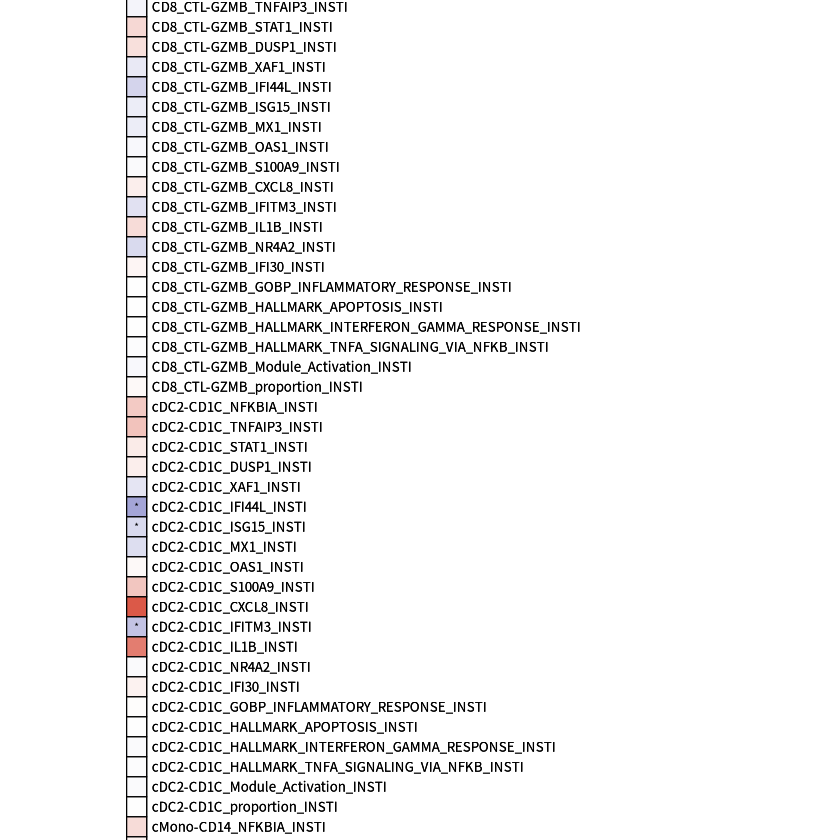

In [47]:
p <- pheatmap(data1,
              cluster_cols = F,
              cluster_rows = F,
              fontsize = 8,
              breaks = seq(-0.5,0.5,length.out = 100),
              display_numbers = ifelse(data2 > 0.01 & data2 < 0.05, "*", 
                                       ifelse(data2 > 0.001 & data2 < 0.01, "**", 
                                              (ifelse(data2 < 0.001, "***", "")))),
              number_color = "black",
              fontsize_number = 6,
              #color = colorRampPalette(c("navy","white","firebrick3"))(100),
              #color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(100),
              #color = colorRampPalette(c("#72368F","white","#3B8638"))(100),
              color = colorRampPalette(c("#A1A2D6","white","#D84B38"))(100),
              fontsize_col = 8,
              fontsize_row = 8,
              show_colnames = T,
              cellwidth = 12, 
              cellheight = 12,
              annotation_legend	= T,
              border = T,
              border_color = "black")
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/INSTI.pdf",p,width=6,height=50,limitsize = FALSE)